In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\Exam_Dataset.csv")

In [3]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [4]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048574,443,6,14/02/2018 10:53:28,5807256,6,4,327,145,245,0,...,20,291569.0,0.0,291569,291569,5515650.0,0.0,5515650,5515650,Benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [6]:
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [7]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [8]:
print(df['Label'].value_counts())  # Shows count of each class
print("\nUnique classes:", df['Label'].unique())  # Shows unique class names
print("\nNumber of classes:", df['Label'].nunique())  # Shows total number of classes


Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64

Unique classes: ['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']

Number of classes: 3


In [9]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


In [11]:
X = df.drop(columns=["Label"])
y = df["Label"]


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

In [16]:
class IntrusionNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(IntrusionNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = IntrusionNet(X_train.shape[1], len(label_encoder.classes_)).to(device)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# 🚀 Initialize lists to track metrics
train_losses = []
train_accuracies = []

# 🚀 Training Loop
epochs = 30
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Save loss
    train_losses.append(loss.item())

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)
    train_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.4f} | Accuracy: {accuracy:.4f}")


Epoch [1/30] Loss: 1.0992 | Accuracy: 0.2970
Epoch [2/30] Loss: 1.0646 | Accuracy: 0.4829
Epoch [3/30] Loss: 1.0301 | Accuracy: 0.6155
Epoch [4/30] Loss: 0.9958 | Accuracy: 0.6927
Epoch [5/30] Loss: 0.9617 | Accuracy: 0.7586
Epoch [6/30] Loss: 0.9273 | Accuracy: 0.7986
Epoch [7/30] Loss: 0.8928 | Accuracy: 0.8128
Epoch [8/30] Loss: 0.8583 | Accuracy: 0.8174
Epoch [9/30] Loss: 0.8239 | Accuracy: 0.8190
Epoch [10/30] Loss: 0.7893 | Accuracy: 0.8194
Epoch [11/30] Loss: 0.7551 | Accuracy: 0.8197
Epoch [12/30] Loss: 0.7211 | Accuracy: 0.8197
Epoch [13/30] Loss: 0.6877 | Accuracy: 0.8197
Epoch [14/30] Loss: 0.6548 | Accuracy: 0.8197
Epoch [15/30] Loss: 0.6230 | Accuracy: 0.8197
Epoch [16/30] Loss: 0.5923 | Accuracy: 0.8197
Epoch [17/30] Loss: 0.5628 | Accuracy: 0.8197
Epoch [18/30] Loss: 0.5344 | Accuracy: 0.8197
Epoch [19/30] Loss: 0.5074 | Accuracy: 0.8199
Epoch [20/30] Loss: 0.4817 | Accuracy: 0.8199
Epoch [21/30] Loss: 0.4573 | Accuracy: 0.8200
Epoch [22/30] Loss: 0.4342 | Accuracy: 0.82

In [19]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, dim=1)


In [20]:
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), target_names=target_names))


                precision    recall  f1-score   support

        Benign       0.93      1.00      0.97    133525
FTP-BruteForce       1.00      1.00      1.00     38672
SSH-Bruteforce       1.00      0.75      0.85     37518

      accuracy                           0.95    209715
     macro avg       0.98      0.92      0.94    209715
  weighted avg       0.96      0.95      0.95    209715



In [21]:
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), target_names=target_names))


                precision    recall  f1-score   support

        Benign       0.93      1.00      0.97    133525
FTP-BruteForce       1.00      1.00      1.00     38672
SSH-Bruteforce       1.00      0.75      0.85     37518

      accuracy                           0.95    209715
     macro avg       0.98      0.92      0.94    209715
  weighted avg       0.96      0.95      0.95    209715



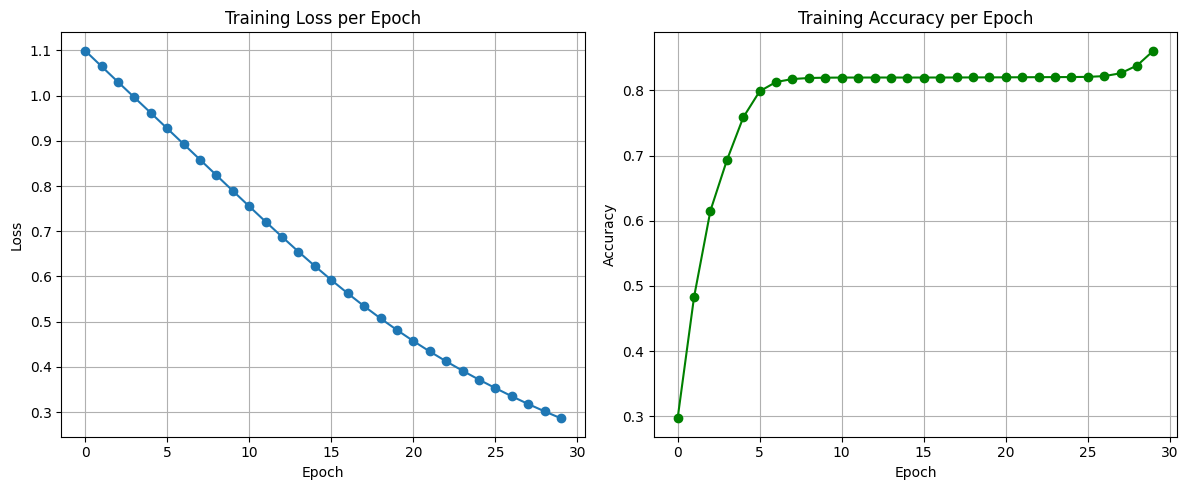

In [22]:
import matplotlib.pyplot as plt

# 📉 Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 📈 Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, marker='o', color='green')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()
